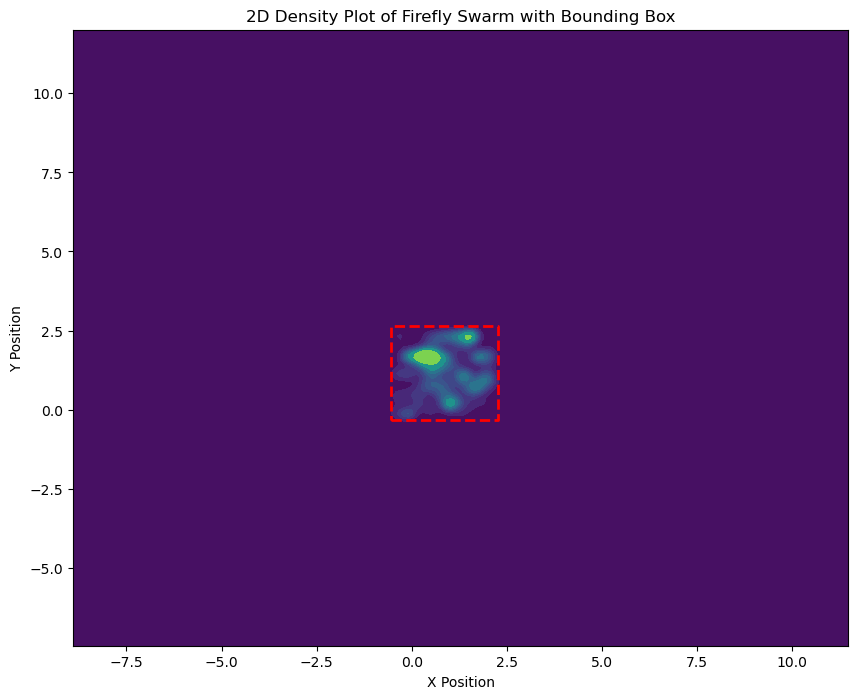

Bounding box coordinates: x_min=-0.55062356016993, x_max=2.27534594894824, y_min=-0.33907461586322, y_max=2.65333931043806


In [1]:
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

FNAME = '/Users/nbonnie/Desktop/xyztkj_tc_20240518_crit_a.csv'

# Load CSV data with specified column names
try:
    df = pd.read_csv(FNAME, header=None, names=['x', 'y', 'z', 't', 'k', 'j'])
except FileNotFoundError:
    print("CSV file not found. Please make sure the path is correct.")
    sys.exit()

def find_significant_bounding_box(df, threshold=0.95):
    # Calculate the KDE
    xy = np.vstack([df['x'], df['y']])
    kde = gaussian_kde(xy)
    density = kde(xy)

    # Sort densities and find the cutoff for the given threshold
    sorted_density = np.sort(density)
    cutoff_index = int((1 - threshold) * len(sorted_density))
    density_threshold = sorted_density[cutoff_index]

    # Find the bounding box for points above the density threshold
    significant_points = xy[:, density > density_threshold]
    x_min, y_min = significant_points.min(axis=1)
    x_max, y_max = significant_points.max(axis=1)

    return x_min, x_max, y_min, y_max

def visualize_density_with_bounding_box(df, x_min, x_max, y_min, y_max):
    plt.figure(figsize=(10, 8))
    sns.kdeplot(x=df['x'], y=df['y'], cmap='viridis', fill=True, thresh=0)
    plt.title('2D Density Plot of Firefly Swarm with Bounding Box')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    
    # Plot the bounding box
    plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], 
             color='red', linestyle='--', linewidth=2)
    
    plt.show()

def main():
    x_min, x_max, y_min, y_max = find_significant_bounding_box(df)
    visualize_density_with_bounding_box(df, x_min, x_max, y_min, y_max)
    print(f"Bounding box coordinates: x_min={x_min}, x_max={x_max}, y_min={y_min}, y_max={y_max}")

if __name__ == '__main__':
    main()
